In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras import optimizers
from keras.layers import Dropout, Flatten
from keras.models import load_model
from PIL import Image
import cv2
from __future__ import print_function #not sure if this is needed
!pip install -U -q PyDrive

Using TensorFlow backend.


In [105]:
####  FOR USE WITH GOOGLE COLAB  ####
#This cell mounts your google drive to allow for fiel access and storage
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
####  FOR USE WITH GOOGLE COLAB  ####
#here is an example of opening a file from your mounted google drive

img = cv2.imread('drive/My Drive/EPICProjectThree/dylanOriginal384x384.png')
# print (type(img))
# print (img.shape)

In [27]:
####  USE TO RUN LOCALLY  ####
img = cv2.imread('../data/faces/weirdFace4.jpg')
print (type(img))
print (img.shape)

<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
originalDimX=img.shape[0]
# print(originalDimX)
originalDimY=img.shape[1]
# print(originalDimY)

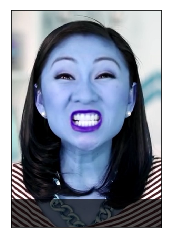

In [5]:
#taking a look at the image we read
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

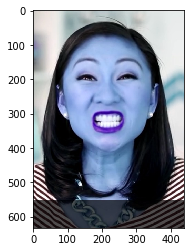

In [10]:
#To run the model on this image we need to crop to just the face

# COMMENT OUT THE VERSION YOU ARE NOT RUNNING BELOW #

####  FOR USE WITH GOOGLE COLAB  ####
# face_cascade = cv2.CascadeClassifier('drive/My Drive/EPICProjectThree/haarcascade_frontalface_default.xml')

####  USE TO RUN LOCALLY  ####
face_cascade = cv2.CascadeClassifier('../colabFiles/EPICProjectThree/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# imgray = (255-gray)
plt.imshow(img, cmap = 'gray')

67 82 295 295


(-0.5, 437.5, 632.5, -0.5)

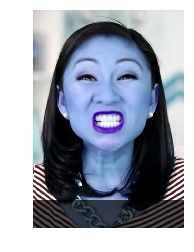

In [11]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    print(x,y,w,h)
plt.imshow(img)
plt.axis('off')

(-0.5, 294.5, 294.5, -0.5)

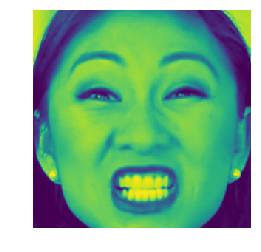

In [12]:
# cropping the image down to just the face that face_cascade detected
imgCropped = gray[y:y+h, x:x+w]
plt.imshow(imgCropped)
plt.axis('off')

In [13]:
#saving the dimensions of the cropped image and the crop distances
croppedDimX=imgCropped.shape[0]
print(croppedDimX)
croppedDimY=imgCropped.shape[1]
print(croppedDimX)
cropOffsetX = (originalDimX - croppedDimX)/2
print(cropOffsetX)
cropOffsetY = (originalDimY - croppedDimY)/2
print(cropOffsetY)

295
295
169.0
71.5


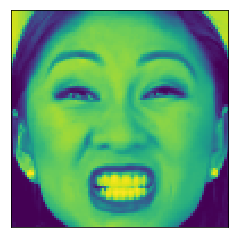

(96, 96)
0.3254237288135593
0.3254237288135593


In [14]:
#resizing image to 96x96 for model prediction
imgCropped96 = cv2.resize(imgCropped, (96, 96))
plt.imshow(imgCropped96)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(imgCropped96.shape)

#calculating the resizing ratios
ratioTo96x = 96/croppedDimX
ratioTo96y = 96/croppedDimY
print(ratioTo96x)
print(ratioTo96y)

In [15]:
#converting pixel data to 0-1 format for model
imgCropped96 = imgCropped96 / 255
imgCropped96.shape

(96, 96)

In [17]:
#To use the model we need to setup a pipeline for the output array

# COMMENT OUT THE VERSION YOU ARE NOT RUNNING BELOW #

####  FOR USE WITH GOOGLE COLAB  ####
# df = pd.read_csv('drive/My Drive/EPICProjectThree/training.csv')

####  USE TO RUN LOCALLY  ####
df = pd.read_csv('../data/training.csv')
twoKGoodFaces = df.dropna()
y = np.vstack(twoKGoodFaces[twoKGoodFaces.columns[:-1]].values)
y.shape, y.dtype

((2140, 30), dtype('float64'))

In [19]:
#loading the model that was trained to predict keypoints

# COMMENT OUT THE VERSION YOU ARE NOT RUNNING BELOW #

####  FOR USE WITH GOOGLE COLAB  ####
# model = load_model('drive/My Drive/EPICProjectThree/tKeypointModel1227.h5')

####  USE TO RUN LOCALLY  ####
model = load_model('../colabFiles/EPICProjectThree/tKeypointModel1227.h5')

In [20]:
# Creating pipeline
output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)
y_train = output_pipe.fit_transform(y)

In [21]:
#making predictions for our target face
predictions = model.predict(imgCropped96[np.newaxis, :, :, np.newaxis])
predictions

predictions

array([[ 0.26410595,  0.12438872, -0.15499666,  0.1488906 ,  0.2897026 ,
         0.02709545,  0.2683637 , -0.05829275,  0.09839156,  0.24095768,
        -0.27768075,  0.01110969,  0.33281192, -0.27379003,  0.2738955 ,
        -0.1498865 ,  0.04177909, -0.31924772, -0.44083345, -0.04152739,
         0.18135646, -0.1310156 ,  0.00318816, -0.06959537,  0.05560925,
        -0.00223538,  0.08230856, -0.3624227 ,  0.08765864,  0.34609985]],
      dtype=float32)

In [22]:
#converting the predictions to x,y coordinates
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
xy_predictions

array([[66.909424, 36.369606],
       [28.882055, 36.955856],
       [59.347485, 37.461163],
       [74.5633  , 37.269787],
       [36.8436  , 37.81406 ],
       [21.526913, 38.392303],
       [57.02019 , 24.731485],
       [80.21257 , 26.802465],
       [38.728596, 24.294392],
       [13.849258, 28.384378],
       [48.57643 , 56.51985 ],
       [64.38349 , 74.53831 ],
       [31.52116 , 75.02561 ],
       [48.24828 , 68.57712 ],
       [49.031013, 83.196335]], dtype=float32)

(-0.5, 95.5, 95.5, -0.5)

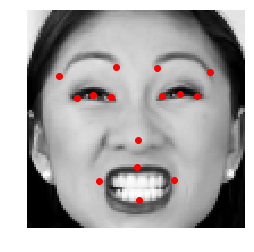

In [23]:
#taking a look at our predicted keypoints on our target face
plt.imshow(imgCropped96, cmap='gray')
plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'ro')
plt.axis('off')

In [24]:
#####  MATH NEEDS CORRECTING

#increasing the scale of the predicted keypoitn to the size of the original image after cropping
scaledUpPredictions = xy_predictions/ratioTo96x
print(scaledUpPredictions)

[[205.60709  111.76077 ]
 [ 88.75215  113.56227 ]
 [182.36989  115.115036]
 [229.12682  114.526955]
 [113.21732  116.19946 ]
 [ 66.15041  117.97636 ]
 [175.2183    75.997795]
 [246.48656   82.36175 ]
 [119.00975   74.65464 ]
 [ 42.557617  87.22283 ]
 [149.27133  173.6808  ]
 [197.84511  229.05002 ]
 [ 96.8619   230.54745 ]
 [148.26295  210.73178 ]
 [150.66823  255.65541 ]]


In [25]:
#Adding offsets to scaled image to adjust for cropping
predictionsForOriginal = scaledUpPredictions + cropOffsetX
print(predictionsForOriginal)


[[374.6071  280.76077]
 [257.75214 282.56226]
 [351.36987 284.11505]
 [398.12683 283.52695]
 [282.21732 285.19946]
 [235.15042 286.97635]
 [344.21832 244.9978 ]
 [415.48657 251.36176]
 [288.00977 243.65463]
 [211.55762 256.22284]
 [318.27133 342.6808 ]
 [366.8451  398.05002]
 [265.8619  399.54745]
 [317.26294 379.73178]
 [319.6682  424.6554 ]]


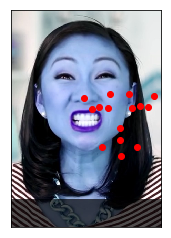

In [26]:
#putting the predicted keypoints on the original image
plt.imshow(img, cmap = 'gray')
plt.plot(predictionsForOriginal[:, 0], predictionsForOriginal[:, 1], 'ro')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Adding accessory items to face

In [0]:
#now preparing to add an accessory item to the face

In [0]:
# These files are a 'workaround', 'trick', or 'hack' to get around the fact that when Pillow scales 
# a png image, it loses transparency. Invoking these functions on the image before and after a 'resize' 
# will retain transparency. See next cell for example use.

def premultiply(im):
    pixels = im.load()
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            r, g, b, a = pixels[x, y]
            if a != 255:
                r = r * a // 255
                g = g * a // 255
                b = b * a // 255
                pixels[x, y] = (r, g, b, a)

def unmultiply(im):
    pixels = im.load()
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            r, g, b, a = pixels[x, y]
            if a != 255 and a != 0:
                r = 255 if r >= a else 255 * r // a
                g = 255 if g >= a else 255 * g // a
                b = 255 if b >= a else 255 * b // a
                pixels[x, y] = (r, g, b, a)

In [131]:
# For now I am assuming a single CSV file expected to have an accessory image file name in the first column and coordinates in other columns.

imageFile = 'drive/My Drive/EPICProjectThree/accessoryKeypoints.csv'
imagesDF = pd.read_csv(imageFile)
imagesDF

,file_name,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,redSunGlasses457x172.png,322.4403,71.0892,139.6395,71.0892,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,oakleys.png,400.0000,155.0000,190.0000,155.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PNG (600, 330) RGBA


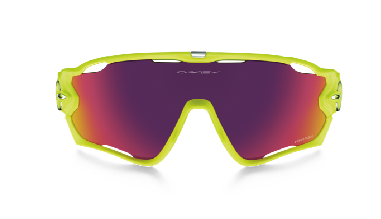

In [132]:
imageDirectoryPath = 'drive/My Drive/EPICProjectThree/'
accessoryFileName = 'oakleys.png'
accessoryFilePath = imageDirectoryPath + accessoryFileName
accessory = Image.open(accessoryFilePath)
print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

In [0]:
# Picking the row out of the datatable with the accessory info
accessoryRowDF = imagesDF.loc[imagesDF['file_name'] == accessoryFileName]


In [0]:
# Comparing the target face eye width (center to center) 
# and the accessory eye width (center to center) to determine the scaling factor to make the accessory fit the face
imageEyeWidth = predictionsForOriginal[0, 0]-predictionsForOriginal[1, 0]
# print("face eye width: ",imageEyeWidth)
accessoryEyeWidth = accessoryRowDF.iloc[0]["left_eye_center_x"]-accessoryRowDF.iloc[0]["right_eye_center_x"]
# print("accessory eye width: ", accessoryEyeWidth)
scaleFactorAcsy2Face = accessoryEyeWidth/imageEyeWidth
# print("Scale factor: " , scaleFactorAcsy2Face)

In [0]:
# Calculating the new accessory size and keypoint coordinates
newAcsySize = accessory.size/scaleFactorAcsy2Face
newAcsySize = newAcsySize.astype(int)
newAcsyLeftEyeCenterX = int(accessoryRowDF.iloc[0]["left_eye_center_x"]/scaleFactorAcsy2Face)
newAcsyRightEyeCenterX = int(accessoryRowDF.iloc[0]["right_eye_center_x"]/scaleFactorAcsy2Face)
newAcsyLeftEyeCenterY = int(accessoryRowDF.iloc[0]["left_eye_center_y"]/scaleFactorAcsy2Face)
newAcsyRightEyeCenterY = int(accessoryRowDF.iloc[0]["right_eye_center_y"]/scaleFactorAcsy2Face)
# print("new accessory dimensions: ",newAcsySize)

In [0]:
#Scaling the accessory image file with pre and post processing functions to maintain transparency
premultiply(accessory)
accessory = accessory.resize(newAcsySize)
unmultiply(accessory)
# print(accessory.format, accessory.size, accessory.mode)
accessory.show()

<function matplotlib.pyplot.show>

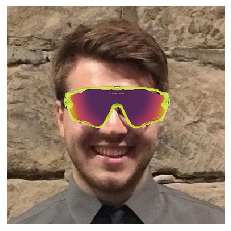

In [138]:
# pasting the resized, transparent png accessory image onto the test image

targetFaceFileName = 'dylanOriginal384x384.png'
targetFaceFilePath = imageDirectoryPath + targetFaceFileName
targetFace = Image.open(targetFaceFilePath)
x1 = int(predictionsForOriginal[1, 0])-newAcsyRightEyeCenterX
x2 = x1+newAcsySize[0]
y1 = int(predictionsForOriginal[1, 1])-newAcsyRightEyeCenterY
y2 = y1+newAcsySize[1]

box=(x1,y1,x2,y2)
targetFace.paste(accessory, box, accessory)
targetFace.show()
plt.imshow(targetFace)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show
